<a href="https://colab.research.google.com/github/laviniaflorentina/neural_networks_dissertation/blob/master/nn_dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Licentaa

https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


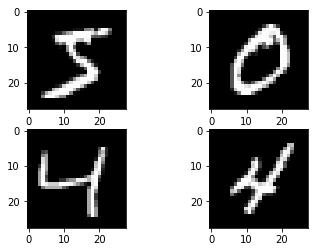

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Forme

In [0]:
y_train.shape # label la fiecare image

(60000,)

In [0]:
X_train.shape #(imagini, lungime imagine, latime imagine)

(60000, 28, 28)

### sample

In [0]:
X_train[0] #255 - maxim - culoare alb | 0 - negru

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
y_train[0]

5

### Baseline Model with Multi-Layer Perceptrons

NN - neural networks

Baseline - primul model (cel mai prost) cu care o sa comparam restu. Model care nu trebuie sa fie bun (perfromante mari). Model de sine stator. Model de baza.

Model - NN/ AI / orice are input si scoate output.

Multi-Layer Perceptrons - forma primitiva de NN (putini neuroni si putine layere de neuroni)

Perceptron - 1 neuron / 1 node 

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
# luam fiecare imagine si o strivim intr-un vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


# normalize inputs from 0-255 to 0-1
# important pentru NN ca sa invete mai repede
# impart fiecare numar din input la 255
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# define baseline model
# create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# printeaza cum arata modelul
model.summary()

# None - poate avea orice dimensiune - se refera la numarul de imagini (exemple)


W0630 18:52:50.024404 140358457550720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 18:52:50.055944 140358457550720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 18:52:50.061167 140358457550720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0630 18:52:50.085708 140358457550720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 18:52:50.110415 140358457550720 deprecation_wrapper.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model
# unde vezi fit inseamna train
# in fit (adica train) mereu ii dai input si output

# validation_data - folosita in timp ce trainuim moelul

# loss - eroare intre ce a prezis modelul si care e labelul adevarat - cat mai mic e mai bine

# acc (accuracy) - cat de bine prezice ce label trebuie sa fie - cat mai mare e mai bine

# epochs - 1 trecere completa prin train data

# batch_size - grup de imagini date ca input deodata pentru training. Din alea 60 000 ia cate 200 de imaginie si invata ca un calup

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

W0630 18:52:50.224182 140358457550720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0630 18:52:50.268599 140358457550720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1412 - val_acc: 0.9575
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1115 - acc: 0.9676 - val_loss: 0.0922 - val_acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0718 - acc: 0.9799 - val_loss: 0.0782 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0505 - acc: 0.9857 - val_loss: 0.0750 - val_acc: 0.9771
Epoch 5/10
57600/60000 [===========================>..] - ETA: 0s - loss: 0.0371 - acc: 0.9895

### Simple Convolutional Neural Network for MNIST

Alt tip de NN

O sa creeam alt model cu alta arhitecture 

arhitectura - diferiti neuroni

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]




In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))      # NOTA !!!! CONVOLUTION
model.add(MaxPooling2D(pool_size=(2, 2)))     # LAYER DE MICSORARE (IA PIXELUL CU VALOARE MAXIMA)
model.add(Dropout(0.2)) #seteaza valori pe zero random din matrici
model.add(Flatten()) # face orice dimensiune intr-un vector
model.add(Dense(128, activation='relu')) # NN normal layer
model.add(Dense(num_classes, activation='softmax')) # NN normal layer
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2226 - acc: 0.9365 - val_loss: 0.0789 - val_acc: 0.9754
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0713 - acc: 0.9783 - val_loss: 0.0458 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0461 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0390 - acc: 0.9881 - val_loss: 0.0413 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0326 - acc: 0.9899 - val_loss: 0.0349 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0266 - acc: 0.9916 - val_loss: 0.0333 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0356 - val_acc